In [1]:
import numpy as np
import random
from HyperRD.Hgraph import *
from HyperRD.Hrandom import *
from HyperRD.Halgorithm import *
from HyperRD.Htranslate import *

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
a = simple_bipartite(7, 15, 8, 0.5)
a.edges_dict

{0: frozenset({0, 1, 3, 6}),
 1: frozenset({2}),
 2: frozenset({3}),
 3: frozenset({0, 2, 3, 6}),
 4: frozenset({0, 1, 3, 4, 6}),
 5: frozenset({1, 3, 4, 6}),
 6: frozenset({1, 2, 3, 4, 6})}

In [3]:
a.inci_matrix

matrix([[1., 0., 0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 1., 1., 1.],
        [0., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 1.]])

In [4]:
a = simple_matrix(4, 8, 0.5)
a.edges_dict

{0: frozenset({0, 3}),
 1: frozenset({0, 1}),
 2: frozenset({0, 2}),
 3: frozenset({3}),
 4: frozenset({0, 1, 3})}

In [5]:
a.inci_matrix

matrix([[1., 1., 1., 0., 1.],
        [0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 1.]])

In [6]:
a = k_uniform(5, 3, 0.5)
a.edges_dict

{0: frozenset({0, 3, 4}),
 1: frozenset({0, 1, 3}),
 2: frozenset({0, 2, 3}),
 3: frozenset({1, 2, 4})}

In [7]:
a.inci_matrix

matrix([[1., 1., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 1.],
        [1., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [8]:
# class Create_Normal(object):
 
#     # init function to declare class variables
#     def __init__(self, vertices):
        
#         # represent graph as adjacency list
#         self.vertices = vertices
#         self.adj = [[] for i in range(vertices)]
 
#     def DFS_Utility(self: object, temp: list, vertex: int, visited: list) -> list:
#         '''Depth-first search algorithm'''
#         # Mark the current vertex as visited
#         visited[vertex] = True
 
#         # Store the vertex to list
#         temp.append(vertex)
 
#         # Repeat for all vertices adjacent
#         # to this vertex v
#         for i in self.adj[vertex]:
#             if visited[i] == False:
 
#                 # Update the list
#                 temp = self.DFS_Utility(temp, i, visited)
#         return temp

#     def addEdge(self: object, start: int, end: int) -> None:
#         '''add edge'''
#         self.adj[start].append(end)
#         self.adj[end].append(start)
 
#     # Method to retrieve connected components
#     # in an undirected graph
#     def connected_components(self: object) -> list:
#         '''return list of connected components'''
#         visited = []
#         components = []
#         for i in range(self.vertices):
#             visited.append(False)
#         for vertex in range(self.vertices):
#             if visited[vertex] == False:
#                 temp = []
#                 components.append(self.DFS_Utility(temp, vertex, visited))
#         return components

In [9]:
# Create a graph given in the above diagram
# 5 vertices numbered from 0 to 4
g = Create_Normal(5)
g.add_edge(1, 0)
g.add_edge(2, 1)
g.add_edge(3, 4)
cc = g.connected_components()
print("Following are connected components")
print(cc)

Following are connected components
[[0, 1, 2], [3, 4]]


In [10]:
import itertools

def graph_expansion(graph: object, mode: str) -> object:
    '''expand hypergraph to normal graph'''
    vertices = graph.vertices_dict
    vertices_swap = {v: k for k, v in vertices.items()}
    edges = graph.edges_dict
    vertices_length = len(vertices)
    edges_length = len(edges)
    if mode == 'clique':
        g = Create_Normal(vertices_length)
        for edge in range(edges_length):
            for i in itertools.combinations(edges[edge], 2):
                g.add_edge(vertices_swap[i[0]], vertices_swap[i[1]])
    elif mode == 'star':
        g = Create_Normal(vertices_length + edges_length)
        for edge in range(edges_length):
            for i in edges[edge]:
                g.add_edge(edge + vertices_length, vertices_swap[i])
    return g

In [2]:
graph = Create()
graph.add_edge([1, 2, 5])
graph.add_edge([1, 3])
graph.add_edge([3, 4, 6])

In [3]:
import matplotlib.pyplot as plt

In [4]:
graph_expand = graph_expansion(graph, 'clique')
graph_expand.adj

[[1, 4, 2], [0, 4], [3, 5, 0], [2, 5], [0, 1], [2, 3]]

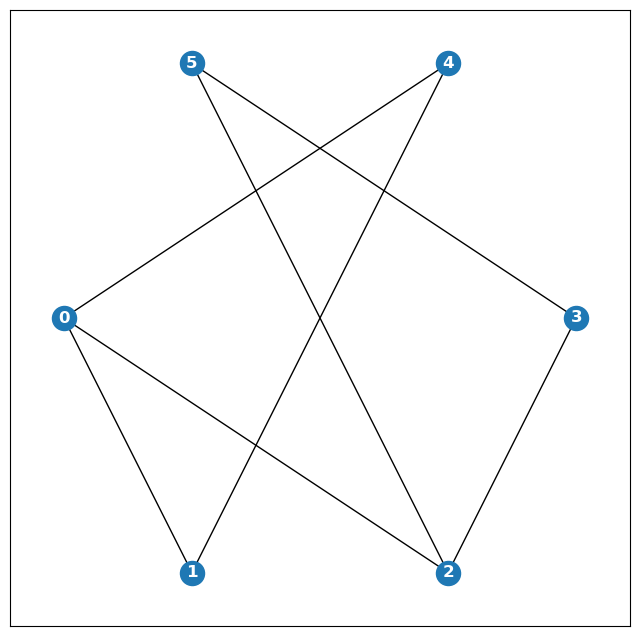

In [5]:
graph_networkx = hyperrd_to_networkx(graph_expand)
pos = nx.shell_layout(graph_networkx)
nx.draw_networkx(graph_networkx, pos = pos, font_weight = 'bold', font_color = 'w')  # networkx draw()
plt.draw()  # pyplot draw()

In [6]:
graph_expand = graph_expansion(graph, 'star')
graph_expand.adj

[[6, 8], [6], [7, 8], [7], [6], [7], [0, 1, 4], [2, 3, 5], [0, 2]]

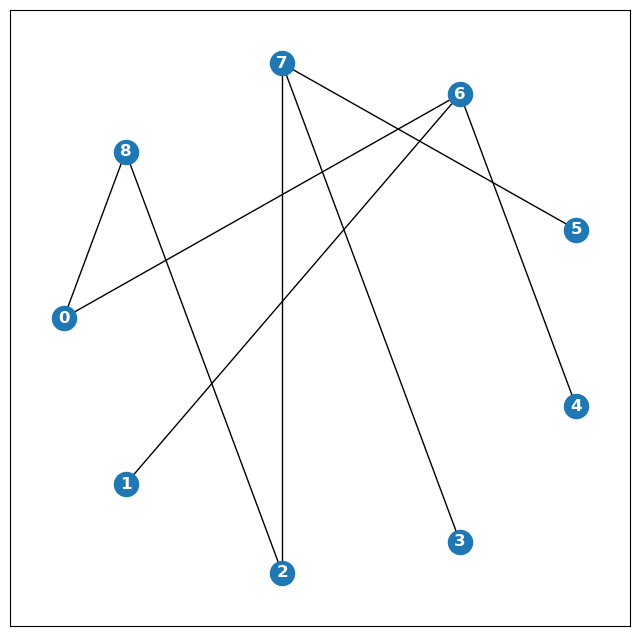

In [7]:
graph_networkx = hyperrd_to_networkx(graph_expand)
pos = nx.shell_layout(graph_networkx)
nx.draw_networkx(graph_networkx, pos = pos, font_weight = 'bold', font_color = 'w')  # networkx draw()
plt.draw()  # pyplot draw()

In [8]:
graph = Create()
graph.add_edge([1, 2, 5])
graph.add_edge([1, 3])
graph.add_edge([3, 4, 6])

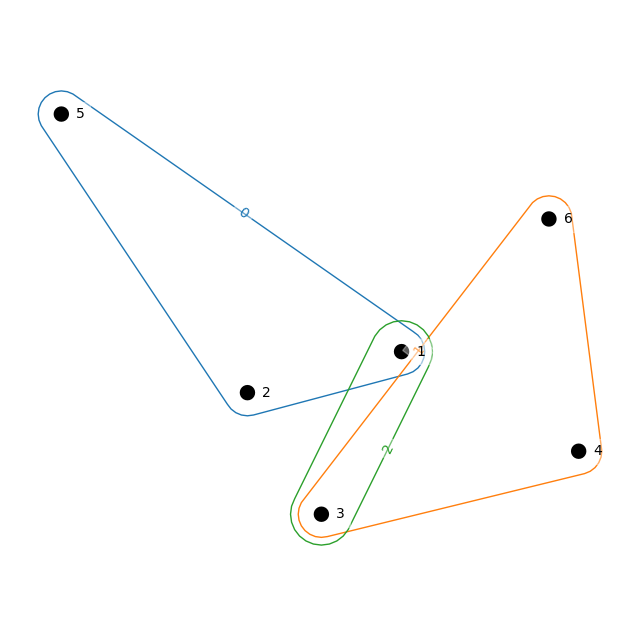

In [9]:
H = hnx.Hypergraph(graph.edges_dict)
hnx.drawing.draw(H)

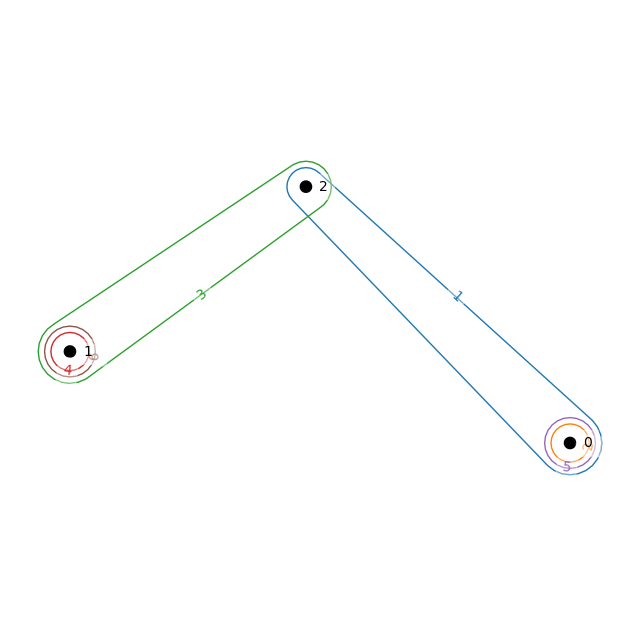

In [10]:
hnx.drawing.draw(H.dual())